# 7.4 Multi-Class Neural Networks

## Preparation

In [12]:
# Import the libraries we need for this lab

# Using the following line code to install the torchvision library
# !conda install -y torchvision

import torch 
import torch.nn as nn
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import torch.nn.functional as F
import matplotlib.pylab as plt
import numpy as np

In [26]:
# Define a function to plot accuracy and loss

def plot_accuracy_loss(training_results): 
    plt.subplot(2, 1, 1)
    plt.plot(training_results['Training_loss'], 'r')
    plt.ylabel('loss')
    plt.title('training loss iterations')
    plt.subplot(2, 1, 2)
    plt.plot(training_results['Validation_accuracy'])
    plt.ylabel('accuracy')
    plt.xlabel('epochs')   
    plt.show()

In [3]:
# Define a function to plot model parameters

def print_model_parameters(model):
    count = 0
    for ele in model.state_dict():
        count += 1
        if count % 2 != 0:
            print ("The following are the parameters for the layer ", count // 2 + 1)
        if ele.find("bias") != -1:
            print("The size of bias: ", model.state_dict()[ele].size())
        else:
            print("The size of weights: ", model.state_dict()[ele].size())

In [4]:
# Define a function to display data

def show_data(data_sample):
    plt.imshow(data_sample.numpy().reshape(28, 28), cmap='gray')
    plt.show()

## Neural Network Module

In [6]:
class Net(nn.Module):
    # Contructor
    def __init__(self, D_in, H, D_out):
        super(Net, self).__init__()
        self.linear1 = nn.Linear(D_in, H)
        self.linear2 = nn.Linear(H, D_out)
        
    # Prediction
    def forward(self, x):
        x = torch.sigmoid(self.linear1(x))
        x = self.linear2(x)
        return x

## Load Data

In [13]:
# Create the dataset
train_dataset = dsets.MNIST(root='./data', train=True, download=True, 
                           transform=transforms.ToTensor())
validation_dataset = dsets.MNIST(root='./data', train=False, download=True, 
                           transform=transforms.ToTensor())

In [14]:
# Create the data loader
train_loader = DataLoader(dataset=train_dataset, batch_size=2000)
validation_loader = DataLoader(dataset=validation_dataset, batch_size=5000)

In [15]:
# Create a loss function
criterion = nn.CrossEntropyLoss()

## Training Function

In [17]:
def train(model, criterion, train_loader, validation_loader, optimizer, epochs=100):
    useful_stuff = {'Training_loss': [],
                   'Validation_accuracy': []}
    for epoch in range(epochs): 
        for x, y in train_loader:
            optimizer.zero_grad()
            z = model(x.view(-1, 28*28))
            loss = criterion(z, y)
            
            loss.backward()
            optimizer.step()
            
            useful_stuff['Training_loss'].append(loss.data.item())
        correct = 0
        for x, y in validation_loader:
            z = model(x.view(-1, 28*28))
            _, label = torch.max(z, 1)
            correct += (label == y).sum().item()
        accuracy = 100 * correct / len(validation_dataset)
        useful_stuff['Validation_accuracy'].append(accuracy)
    return useful_stuff

## Train the Model

In [18]:
# Create the model
D_in = 28 * 28
H = 100
D_out = 10
model = Net(D_in, H, D_out)

In [19]:
# Print the parameters for model

print_model_parameters(model)

The following are the parameters for the layer  1
The size of weights:  torch.Size([100, 784])
The size of bias:  torch.Size([100])
The following are the parameters for the layer  2
The size of weights:  torch.Size([10, 100])
The size of bias:  torch.Size([10])


In [23]:
# Set the learning rate and the optimizer
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [24]:
# Train the model
training_results = train(model, criterion, train_loader, validation_loader, 
                         optimizer, epochs=30)

## Result Analysis

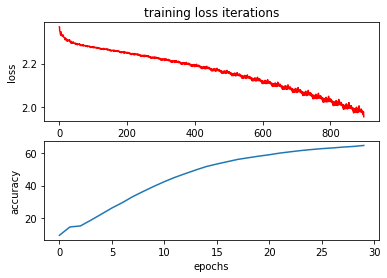

In [27]:
plot_accuracy_loss(training_results)

yhat:  1 
 y:  2


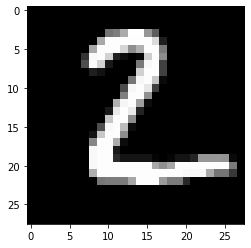

yhat:  7 
 y:  4


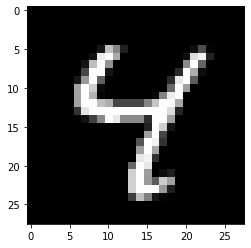

yhat:  6 
 y:  5


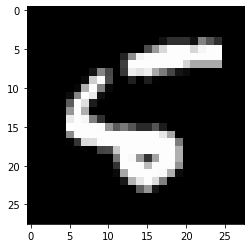

yhat:  7 
 y:  9


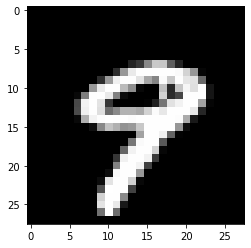

yhat:  0 
 y:  6


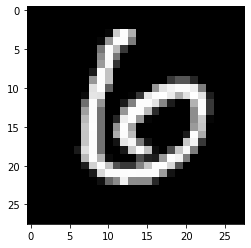

In [33]:
# plot the misclassified samples

count = 0
for x, y in validation_dataset:
    z = model(x.reshape(-1, 28*28))
    _, yhat = torch.max(z, 1)
    if yhat != y:
        print('yhat: ', yhat.item(), '\n',
             'y: ', y)
        show_data(x)
        count += 1
    if count >=5:
        break